In [11]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguedashlineups
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import teamdashlineups
from nba_api.stats.endpoints import leaguegamelog
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.endpoints import leaguestandings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import numpy as np
import time

In [3]:
def LineupData(season,per):
    tempdf = leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense = 'Base', 
                                                 season = season, 
                                                 per_mode_detailed = per).get_data_frames()[0]
    
    tempdf1 = tempdf[['GROUP_ID','GP','PLUS_MINUS']].copy()
    
    print("done")
    return(tempdf1)

In [4]:
def PlayerData(season,per):
    tempdf1 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Base', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf2 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Advanced', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    time.sleep(1)
    tempdf3 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Usage', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf4 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Misc', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    time.sleep(1)
    tempdf5 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Scoring', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    tempdf6 = leaguedashplayerstats.LeagueDashPlayerStats(measure_type_detailed_defense = 'Defense', 
                                                 season = season, season_segment_nullable = 'Pre All-Star',
                                                 per_mode_detailed = per).get_data_frames()[0]
    
    tempdf = pd.merge(tempdf1,tempdf2, on='PLAYER_ID', how='outer', suffixes = ('','_y'))
    tempdf = pd.merge(tempdf,tempdf3, on='PLAYER_ID', how='outer', suffixes = ('','_y'))
    tempdf = pd.merge(tempdf,tempdf4, on='PLAYER_ID', how='outer', suffixes = ('','_y'))
    tempdf = pd.merge(tempdf,tempdf5, on='PLAYER_ID', how='outer', suffixes = ('','_y'))
    tempdf = pd.merge(tempdf,tempdf6, on='PLAYER_ID', how='outer', suffixes = ('','_y'))
    
    tempdf = tempdf[tempdf.columns[~tempdf.columns.str.contains('RANK')]]
    tempdf = tempdf[tempdf.columns[~tempdf.columns.str.contains('_y')]]
    
    print('done')
    return(tempdf)

In [5]:
#Returns dictionary of scores
def nMax(n,playerids,attributes):
    teamscore = 0
    #Loop through players in lineup
    teamAttr = defaultdict(list)
    for player in playerids:
        try:
            playerstats = dfPlayer.loc[dfPlayer['PLAYER_ID'] == int(player)]

            for attr in attributes:
                playerscore = playerstats.iloc[0][attr]
                teamAttr[attr].append(playerscore)
        except:
            continue

    rawAttr = defaultdict()
    for x in teamAttr:
        teamAttr[x].sort(reverse = True)
        teamAttr[x] = teamAttr[x][:n]
        rawAttr[x] = sum(teamAttr[x][:n])
    return(rawAttr)

In [6]:
def GetLineups(season):
    nba_teams = teams.get_teams()

    teamLineups = defaultdict(str)
    for team in nba_teams:
        teamid = team['id']
        teamdf = teamdashlineups.TeamDashLineups(team_id = teamid, season = season, per_mode_detailed = 'Totals').get_data_frames()[1]
        #print(teamdf.head())
        teamdf.sort_values('MIN',ascending = False)
        teamLineups[team['abbreviation']] = teamdf.iat[0,1].split("-")[1:-1]
        #print("done")
        #print(teamLineups)
        time.sleep(1)
    
    print("done")
    return(teamLineups)

In [7]:
def getPlayerInfo(df,season):
    nba_teams = teams.get_teams()
    tempdf = pd.DataFrame()

    for team in nba_teams:
        teamid = team['id']
        roster = commonteamroster.CommonTeamRoster(team_id = teamid,season = season).get_data_frames()[0]
        tempdf = tempdf.append(roster)

        time.sleep(1)

    newRoster = tempdf[['PLAYER_ID','HEIGHT','EXP']].copy()
    df = df.merge(newRoster,on='PLAYER_ID',how='left')
    print("done")
    return(df)


In [8]:
dfLineup = LineupData('2017-18','Per100Possessions')
dfPlayer = PlayerData('2017-18','Per100Possessions')
dfPlayer = getPlayerInfo(dfPlayer,'2017-18')
teamLineups = GetLineups('2017-18')
print(len(dfLineup))
print(len(dfPlayer))
print(len(teamLineups))
print(list(dfPlayer.columns))

done
done
done
done
2000
503
30
['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'CFID', 'CFPARAMS', 'eOFF_RATING', 'OFF_RATING', 'sp_work_OFF_RATING', 'eDEF_RATING', 'DEF_RATING', 'sp_work_DEF_RATING', 'eNET_RATING', 'NET_RATING', 'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'ePACE', 'PACE', 'sp_work_PACE', 'PIE', 'FGM_PG', 'FGA_PG', 'PCT_FGM', 'PCT_FGA', 'PCT_FG3M', 'PCT_FG3A', 'PCT_FTM', 'PCT_FTA', 'PCT_OREB', 'PCT_DREB', 'PCT_REB', 'PCT_AST', 'PCT_TOV', 'PCT_STL', 'PCT_BLK', 'PCT_BLKA', 'PCT_PF', 'PCT_PFD', 'PCT_PTS', 'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT', 'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 

In [9]:
#Convert Height and Experience into numbers
for index, row in dfPlayer.iterrows():
    if pd.isnull(row['HEIGHT']):
        dfPlayer.at[index,'HEIGHT'] = 0   
    else:
        feet = row['HEIGHT'].split('-')[0]
        #print(feet)
        inches = row['HEIGHT'].split('-')[1]
        dfPlayer.at[index,'HEIGHT'] = 12*int(feet) + int(inches)    
    exp = row['EXP']
    if exp == 'R' or pd.isnull(exp):
        dfPlayer.at[index,'EXP'] = 0
    else:
        dfPlayer.at[index,'EXP'] = int(exp)

dfPlayer.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM,DEF_WS,HEIGHT,EXP
0,201166,Aaron Brooks,1610612750,MIN,33.0,27,16,11,0.593,47.9,...,0.255,0.133,0.867,0.857,0.143,0.364,0.636,-0.007,72,9
1,203932,Aaron Gordon,1610612753,ORL,22.0,39,13,26,0.333,47.3,...,0.393,0.478,0.522,0.823,0.177,0.582,0.418,0.085,81,3
2,1627846,Abdel Nader,1610612738,BOS,24.0,28,20,8,0.714,47.8,...,0.356,0.308,0.692,0.929,0.071,0.630,0.370,0.154,78,0
3,203940,Adreian Payne,1610612753,ORL,27.0,5,0,5,0.000,48.9,...,0.286,0.800,0.200,1.000,0.000,0.857,0.143,0.022,0,0
4,201143,Al Horford,1610612738,BOS,32.0,54,35,19,0.648,49.2,...,0.457,0.578,0.422,0.949,0.051,0.678,0.322,0.234,82,10


In [60]:
stand = leaguestandings.LeagueStandings(season = '2017-18').get_data_frames()[0]

for index, row in stand.iterrows():
    preaswin = row['PreAS'].split('-')[0]
    stand.at[index,'PreASWins'] = int(preaswin)
    postaswin = row['PostAS'].split('-')[0]
    stand.at[index,'PostASWins'] = int(postaswin)

    
stand.head()

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,...,Jul,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS,PreASWins,PostASWins
0,00,22017,1610612761,Toronto,Raptors,East,40-12,1,- e,Atlantic,...,None,None,None,4-2,9-5,11-3,41-16,18-7,41.0,18.0
1,00,22017,1610612745,Houston,Rockets,West,41-11,1,- w,Southwest,...,None,None,None,5-3,12-1,9-5,44-13,21-4,44.0,21.0
2,00,22017,1610612738,Boston,Celtics,East,33-19,2,- x,Atlantic,...,None,None,None,5-2,14-2,11-6,40-19,15-8,40.0,15.0
3,00,22017,1610612744,Golden State,Warriors,West,34-18,2,- p,Pacific,...,None,None,None,5-3,11-3,13-2,44-14,14-10,44.0,14.0
4,00,22017,1610612757,Portland,Trail Blazers,West,31-21,3,- nw,Northwest,...,None,None,None,4-3,9-6,5-8,32-26,17-7,32.0,17.0


In [61]:
attributes = ['AST','OREB','DREB','BLK','FG_PCT','FG3_PCT','STL','TOV','OFF_RATING','DEF_RATING','PF','PTS','HEIGHT','EXP']
#attributes = ['AST','OREB','DREB','BLK','FG_PCT','FG3_PCT','STL','TOV','OFF_RATING','DEF_RATING','PF','PTS','HEIGHT','EXP']
rand = nMax(2,['2585', '201142', '201939', '202691', '203110'],attributes)
print(rand)

defaultdict(None, {'AST': 19.200000000000003, 'OREB': 5.5, 'DREB': 20.9, 'BLK': 4.7, 'FG_PCT': 1.1219999999999999, 'FG3_PCT': 0.876, 'STL': 4.1, 'TOV': 8.5, 'OFF_RATING': 236.0, 'DEF_RATING': 215.2, 'PF': 9.5, 'PTS': 71.6, 'HEIGHT': 164, 'EXP': 24})


In [62]:
masterVals = defaultdict(list)
N = 3
for key, value in teamLineups.items():
    vals = nMax(N,value,attributes)
    
    #Get averages to normalize
    for key1, value1 in vals.items():
        masterVals[key1].append(value1)

#Get normalized coefficients
averageVals = defaultdict(float)
normalCoeffs = defaultdict(float)
L = 10
for x in masterVals:
        averageVals[x] = np.mean(masterVals[x])
        normalCoeffs[x] = (L/np.mean(masterVals[x]))

#Work with coefficients
#Offensive
normalCoeffs['AST'] = normalCoeffs['AST'] * 2
normalCoeffs['OREB'] = normalCoeffs['OREB'] * 2
normalCoeffs['FG_PCT'] = normalCoeffs['FG_PCT'] * 1
normalCoeffs['FG3_PCT'] = normalCoeffs['FG3_PCT'] * 1
normalCoeffs['TOV'] = normalCoeffs['TOV'] * -2
normalCoeffs['OFF_RATING'] = normalCoeffs['OFF_RATING'] * 2
normalCoeffs['PTS'] = normalCoeffs['PTS'] * 1

#Defensive
normalCoeffs['DREB'] = normalCoeffs['DREB'] * .5
normalCoeffs['STL'] = normalCoeffs['STL'] * 2
normalCoeffs['DEF_RATING'] = normalCoeffs['DEF_RATING'] * -.9
normalCoeffs['PF'] = normalCoeffs['PF'] * -2
#normalCoeffs['BLK'] = normalCoeffs['BLK'] * 2

#Attributes
normalCoeffs['HEIGHT'] = normalCoeffs['HEIGHT'] * 1
normalCoeffs['EXP'] = normalCoeffs['EXP'] * 2

#Unused
#normalCoeffs['FTM'] = normalCoeffs['FTM'] * 2
#normalCoeffs['W_PCT'] = normalCoeffs['W_PCT'] * 100
#normalCoeffs['TD3'] = normalCoeffs['TD3'] * 1 #.939
#normalCoeffs['EFG_PCT'] = normalCoeffs['EFG_PCT'] * 2 #.943
#normalCoeffs['PTS_PAINT'] = normalCoeffs['PTS_PAINT'] * 1 #.943

#print(normalCoeffs)

#Calculate score for each team
teamRank = defaultdict(int)
for key, value in teamLineups.items():
    vals = nMax(N,value,attributes)
    
    score = 0
    test = {}
    for key1,value1 in vals.items():
        score = score + (normalCoeffs[key1]*value1)
        test[key1] = normalCoeffs[key1]*value1
        
    teamRank[key] = score
    
print(teamRank)
print(test)

defaultdict(<class 'int'>, {'ATL': 99.0457447262682, 'BOS': 99.80031128924144, 'CLE': 111.69002975165387, 'NOP': 116.30981840559735, 'CHI': 91.20697379140752, 'DAL': 99.22147534642775, 'DEN': 108.06346452252222, 'GSW': 124.1478021255799, 'HOU': 131.9241909723174, 'LAC': 105.03533001930487, 'LAL': 88.44450198736834, 'MIA': 109.19456596412624, 'MIL': 105.566259803996, 'MIN': 116.0687524634487, 'BKN': 96.80304593235348, 'NYK': 112.08368931699897, 'ORL': 94.8182576119123, 'IND': 113.11515278972863, 'PHI': 98.60352570367564, 'PHX': 97.28788377785531, 'POR': 91.73428526590227, 'SAC': 88.39435005636929, 'SAS': 121.37482664932213, 'OKC': 132.1480847011339, 'TOR': 109.9204827820812, 'UTA': 109.74687824229585, 'MEM': 91.52713411340153, 'WAS': 103.08391948822164, 'DET': 99.82899000596021, 'CHA': 113.81027239352773})
{'AST': 17.93055795474175, 'OREB': 21.62595114136964, 'DREB': 5.188859214040443, 'BLK': 9.80544747081712, 'FG_PCT': 10.156668452062132, 'FG3_PCT': 9.717365132144698, 'STL': 16.2448499

In [63]:
#Add in Scores to games
for index, row in games.iterrows():
    home = row['MATCHUP'].split(' ')[0]
    away = row['MATCHUP'].split(' ')[2]
    games.at[index,'homeScore'] = teamRank[home]
    games.at[index,'awayScore'] = teamRank[away]
    games.at[index,'netScore'] = teamRank[home] - teamRank[away]
    
games.head(10)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,L,W,homeScore,awayScore,netScore
0,22017,1610612744,GSW,Golden State Warriors,0021700002,2017-10-17,GSW vs. HOU,L,240,43,...,17,25,121,-1,1,1,0,124.147802,131.924191,-7.776389
2,22017,1610612738,BOS,Boston Celtics,0021700001,2017-10-17,BOS @ CLE,L,240,36,...,12,24,99,-3,1,1,0,99.800311,111.690030,-11.889718
4,22017,1610612750,MIN,Minnesota Timberwolves,0021700011,2017-10-18,MIN @ SAS,L,240,37,...,13,16,99,-8,1,1,0,116.068752,121.374827,-5.306074
6,22017,1610612757,POR,Portland Trail Blazers,0021700012,2017-10-18,POR @ PHX,W,240,44,...,18,20,124,48,1,0,1,91.734285,97.287884,-5.553599
8,22017,1610612738,BOS,Boston Celtics,0021700007,2017-10-18,BOS vs. MIL,L,240,39,...,15,27,100,-8,1,1,0,99.800311,105.566260,-5.765949
10,22017,1610612766,CHA,Charlotte Hornets,0021700003,2017-10-18,CHA @ DET,L,240,29,...,17,15,90,-12,1,1,0,113.810272,99.828990,13.981282
12,22017,1610612753,ORL,Orlando Magic,0021700005,2017-10-18,ORL vs. MIA,W,240,43,...,15,18,116,7,1,0,1,94.818258,109.194566,-14.376308
14,22017,1610612754,IND,Indiana Pacers,0021700004,2017-10-18,IND vs. BKN,W,240,53,...,14,25,140,9,1,0,1,113.115153,96.803046,16.312107
16,22017,1610612743,DEN,Denver Nuggets,0021700010,2017-10-18,DEN @ UTA,L,240,36,...,21,18,96,-10,1,1,0,108.063465,109.746878,-1.683414
18,22017,1610612737,ATL,Atlanta Hawks,0021700009,2017-10-18,ATL @ DAL,W,240,48,...,13,18,117,6,1,0,1,99.045745,99.221475,-0.175731


In [64]:
exog = sm.add_constant(games['netScore'])

model = sm.OLS(games['PLUS_MINUS'],games['netScore']).fit()
model1 = sm.Logit(games['W'],games['netScore']).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 39.188052
         Iterations 4


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      W   No. Observations:                 1230
Model:                          Logit   Df Residuals:                     1229
Method:                           MLE   Df Model:                            0
Date:                Mon, 25 Feb 2019   Pseudo R-squ.:                     inf
Time:                        01:38:19   Log-Likelihood:                -48201.
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
netScore       0.0330      0.004      8.843      0.000       0.026       0.040
==============================================================================
"""

Text(0, 0.5, 'Plus - Minus')

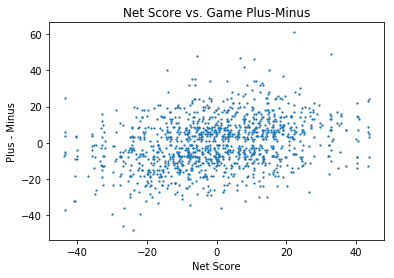

In [65]:
plt.figure(1)
plt.scatter(games['netScore'],games['PLUS_MINUS'],s = 1.5)
plt.title("Net Score vs. Game Plus-Minus")
plt.xlabel("Net Score")
plt.ylabel("Plus - Minus")

In [66]:
total = 0
correct = 0 
for index, row in games.iterrows():
    if row['W'] == 1 and row['netScore'] > 0:
        correct = correct + 1
        total = total + 1
    elif row['W'] == 0 and row['netScore'] < 0:
        correct = correct + 1
        total = total + 1
    elif row['W'] == 1 and row['netScore'] < 0:
        total = total + 1
    elif row['W'] == 0 and row['netScore'] > 0:
        total = total + 1
print(correct)
print(total)
print(correct/total)

750
1230
0.6097560975609756


In [67]:
roster = commonteamroster.CommonTeamRoster(1610612744).get_data_frames()[0]

roster.head(20)

,TeamID,SEASON,LeagueID,PLAYER,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID
0,1610612744,2018,00,DeMarcus Cousins,0,C,6-11,270,"AUG 13, 1990",28.0,8,Kentucky,202326
1,1610612744,2018,00,Damion Lee,1,G,6-6,210,"OCT 21, 1992",26.0,1,Louisville,1627814
2,1610612744,2018,00,Jordan Bell,2,F,6-9,224,"JAN 07, 1995",24.0,1,Oregon,1628395
3,1610612744,2018,00,Quinn Cook,4,G,6-2,179,"MAR 23, 1993",25.0,2,Duke,1626188
4,1610612744,2018,00,Kevon Looney,5,C-F,6-9,220,"FEB 06, 1996",23.0,3,UCLA,1626172
5,1610612744,2018,00,Andre Iguodala,9,G-F,6-6,215,"JAN 28, 1984",35.0,14,Arizona,2738
6,1610612744,2018,00,Jacob Evans,10,G,6-6,210,"JUN 18, 1997",21.0,R,Cincinnati,1628980
7,1610612744,2018,00,Klay Thompson,11,G,6-7,215,"FEB 08, 1990",29.0,7,Washington State,202691
8,1610612744,2018,00,Damian Jones,15,C,7-0,245,"JUN 30, 1995",23.0,2,Vanderbilt,1627745
9,1610612744,2018,00,Jonas Jerebko,21,F,6-10,231,"MAR 02, 1987",31.0,8,"Kinna, Sweden",201973


In [68]:
#print(list(stand.columns))
nba_teams = teams.get_teams()

lookup = {}
for team in nba_teams:
    teamid = team['id']
    lookup[team['nickname']] = team['abbreviation']

for index, row in stand.iterrows():
    name = row['TeamName']
    abbrev = lookup[name]
    stand.at[index,'score'] = teamRank[abbrev]
    
#     away = row['MATCHUP'].split(' ')[2]
#     games.at[index,'homeScore'] = teamRank[home]
#     games.at[index,'awayScore'] = teamRank[away]
#     games.at[index,'netScore'] = teamRank[home] - teamRank[away]

stand.head()

,LeagueID,SeasonID,TeamID,TeamCity,TeamName,Conference,ConferenceRecord,PlayoffRank,ClinchIndicator,Division,...,Aug,Sep,Oct,Nov,Dec,PreAS,PostAS,PreASWins,PostASWins,score
0,00,22017,1610612761,Toronto,Raptors,East,40-12,1,- e,Atlantic,...,None,None,4-2,9-5,11-3,41-16,18-7,41.0,18.0,109.920483
1,00,22017,1610612745,Houston,Rockets,West,41-11,1,- w,Southwest,...,None,None,5-3,12-1,9-5,44-13,21-4,44.0,21.0,131.924191
2,00,22017,1610612738,Boston,Celtics,East,33-19,2,- x,Atlantic,...,None,None,5-2,14-2,11-6,40-19,15-8,40.0,15.0,99.800311
3,00,22017,1610612744,Golden State,Warriors,West,34-18,2,- p,Pacific,...,None,None,5-3,11-3,13-2,44-14,14-10,44.0,14.0,124.147802
4,00,22017,1610612757,Portland,Trail Blazers,West,31-21,3,- nw,Northwest,...,None,None,4-3,9-6,5-8,32-26,17-7,32.0,17.0,91.734285


In [1]:
exog = stand[['score','PreASWins']].copy()
model2 = sm.OLS(stand['PostASWins'],exog).fit()
model3 = sm.OLS(stand['PostASWins'],stand['score']).fit()
model3.summary()

NameError: name 'stand' is not defined

Text(0, 0.5, 'Wins')

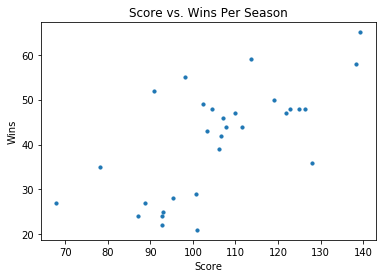

In [57]:
plt.figure(1)
plt.scatter(stand['score'],stand['WINS'],s = 10)
plt.title("Score vs. Wins Per Season")
plt.xlabel("Score")
plt.ylabel("Wins")

In [58]:
#What to do 

#Look at All-Star break before and after
#Fix Score
#Categorize scores into offensive, defensive, and attributes

#Work on actual calcuations
#Potentially add in clutch player 

#Beginning season prediction
#All star break predictions
#Actual what happened

#Look at N-Max for 1,2,3,4,5

